In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 문제 1. Tips data

In [27]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [28]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100). round(2)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66


In [29]:
date = tips.pivot_table('tip_pct', 'day')
date


,tip_pct
day,
Thur,16.126452
Fri,16.991579
Sat,15.314598
Sun,16.689605


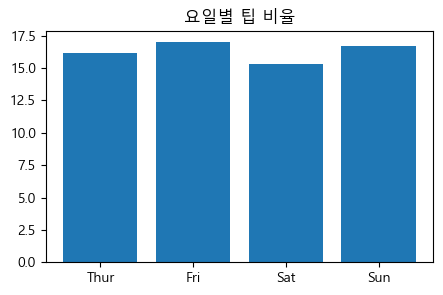

In [30]:
plt.figure(figsize=(5,3))
plt.bar(date.index, date.tip_pct)
plt.title('요일별 팁 비율')
plt.show()

In [31]:
# 2) 인원수별
person = tips.pivot_table('tip_pct','size')
person

,tip_pct
size,
1,21.727500
2,16.571410
3,15.214737
4,14.594865
5,14.152000
6,15.620000


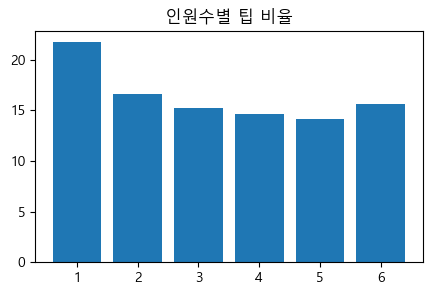

In [32]:
plt.figure(figsize=(5,3))
plt.bar(person.index, person.tip_pct)
plt.title('인원수별 팁 비율')
plt.show()

- 문제 2. Anscombe

In [33]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [34]:
ans.dataset.value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

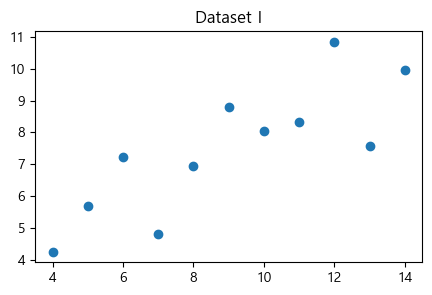

In [35]:
ds = ans[ans.dataset == 'I']
plt.figure(figsize=(5,3))
plt.scatter(ds.x, ds.y, marker='o')
plt.title('Dataset I')
plt.show()

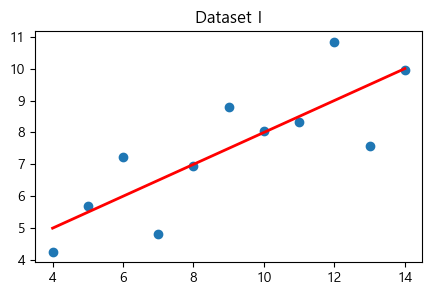

In [36]:
plt.figure(figsize=(5,3))
plt.scatter(ds.x, ds.y, marker='o')
plt.plot([4,14],[5,10],'r-', lw=2)              # y = 0.5 * x + 3
plt.title('Dataset I')
plt.show()

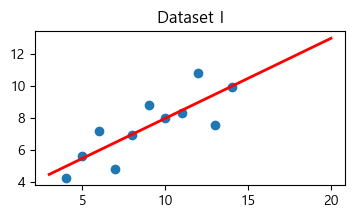

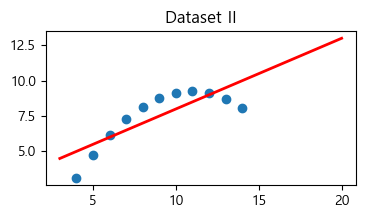

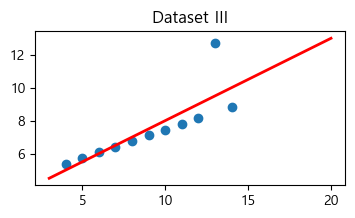

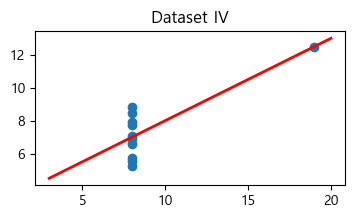

In [37]:
for roman in ['I', 'II', 'III', 'IV']:
    ds = ans[ans.dataset == roman]
    plt.figure(figsize=(4,2))
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([3,20],[4.5,13],'r-', lw=2)              # y = 0.5 * x + 3
    plt.title(f'Dataset {roman}')
    plt.show()

- cctv 데이터

In [38]:
filename = 'd:/workspace/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(filename, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.head()

,구분,총계
0,계,91341
1,종로구,1980
2,중 구,2584
3,용산구,2847
4,성동구,4047


In [39]:
cctv.drop([0], inplace=True)
cctv.set_index('구분', inplace=True)
cctv.head(3)

,총계
구분,
종로구,1980
중 구,2584
용산구,2847


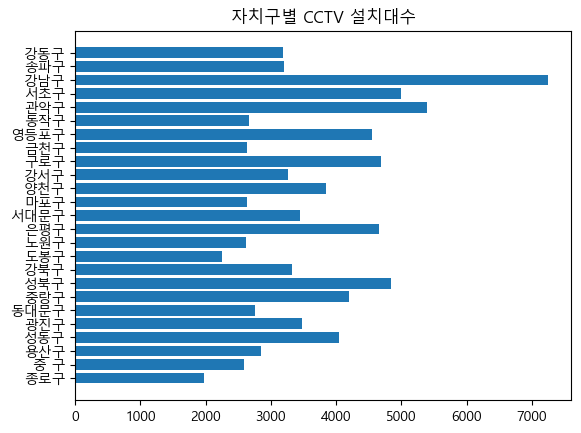

In [40]:
# 1. Unsorted
plt.barh(cctv.index, cctv.총계)
plt.title('자치구별 CCTV 설치대수')
plt.show()

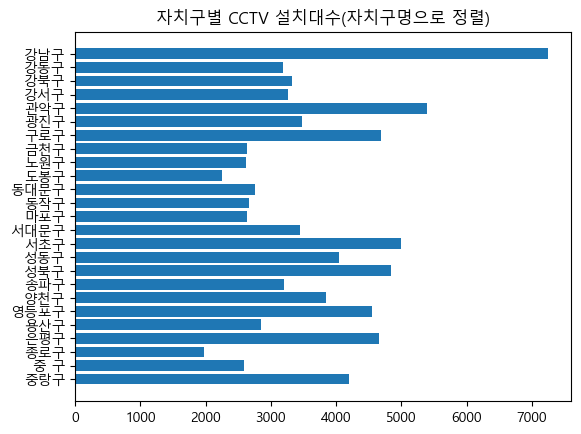

In [41]:
# 2 index로 정렬
si = cctv.총계.sort_index(ascending=False)
plt.barh(si.index, si.values)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)')
plt.show()


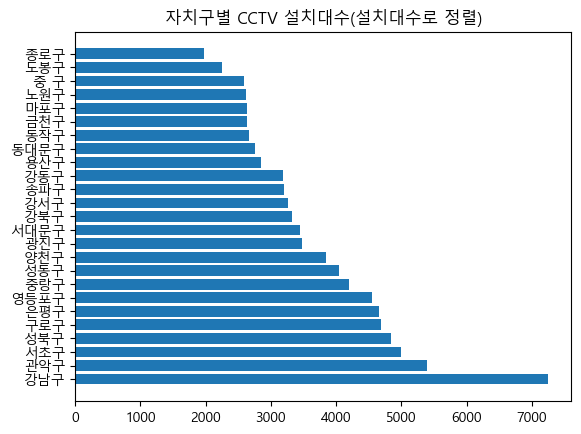

In [42]:
# 3. 설치대수로 정렬
sv = cctv.총계.sort_values(ascending=False)
plt.barh(sv.index, sv.values)
plt.title('자치구별 CCTV 설치대수(설치대수로 정렬)')
plt.show()

In [43]:
# 1) titanic 
# embark.town . sex -> 생존율
# 나이 - > displot


In [ ]:
gender = titanic_df.groupby('sex')['survived'].mean()
embark = titanic_df.groupby('embarked')['survived'].mean()
fig, ax = plt.subplots(col=2, figsize=(10,7))
sns.barplot(x='sex', y='survived', data=gender, ax=ax[0])
ax[0].set_title('Survival Rate by Gender')

In [44]:
# 2) cctv
# 자치구 법정 준
# 자치구 이름
# cctv 갯수 